In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch

from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader

import torch.nn as nn

import torch.optim as optim

In [96]:
from google.colab import files
uploaded = files.upload()

Saving fmnist_small.csv to fmnist_small (1).csv


In [97]:
df = pd.read_csv('fmnist_small.csv')
df.head(4)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
torch.manual_seed(30)

In [99]:
df.shape

(6000, 785)

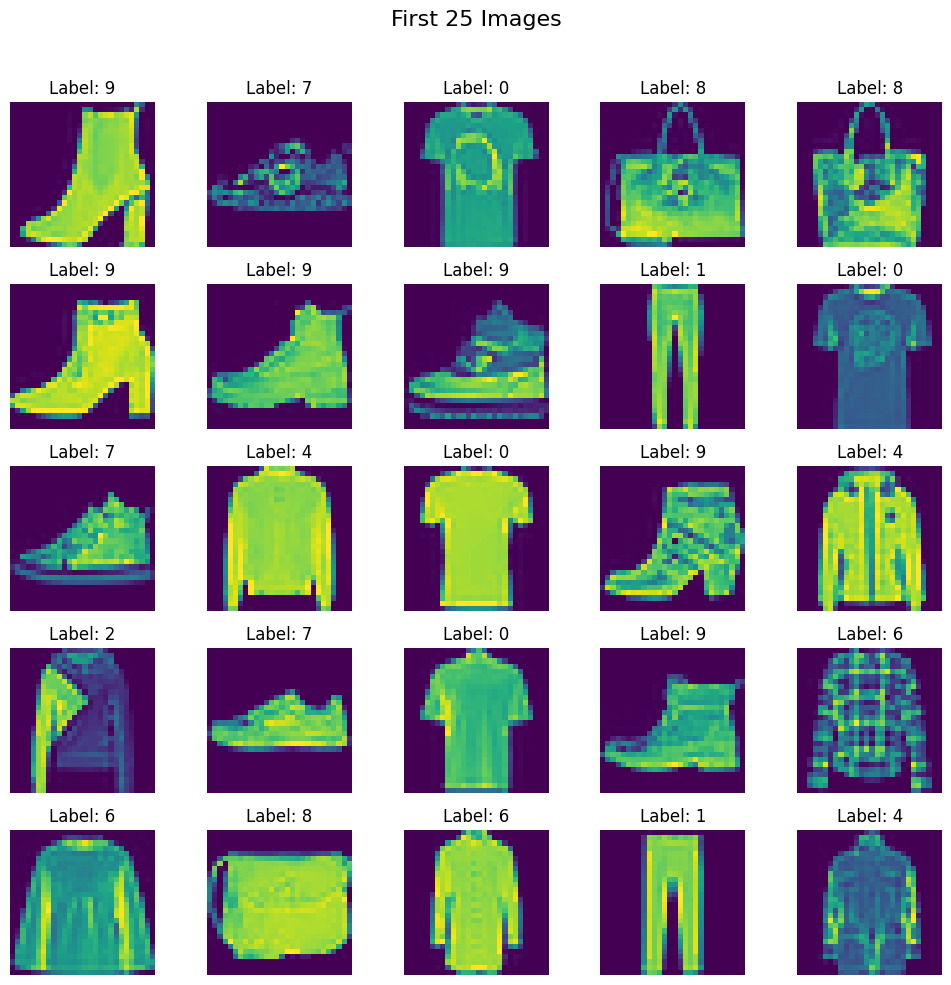

In [100]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.suptitle("First 25 Images", fontsize=16)

# Plot the first 25 images from the dataset
# axes.flat converts the 2D grid into a 1D iterator
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)                  # Reshape to 28x28
    ax.imshow(img)                                       # Display in grayscale
    ax.axis('off')                                     # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")               # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])          # Adjust layout to fit the title
plt.show()

In [101]:
df['label'].value_counts()

,count
label,
6,656
7,620
5,612
2,604
4,595
0,595
3,591
1,590
8,582


In [102]:
x = df.iloc[:, 1:].values
y = df['label'].values

In [103]:
x.shape

(6000, 784)

In [104]:
y

array([9, 7, 0, ..., 8, 4, 8])

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [106]:
print("shape of x_train", x_train.shape)
print("shape of x_test", x_test.shape)
print("shape of y_train", y_train.shape)
print("shape of y_test", y_test.shape)

shape of x_train (4800, 784)
shape of x_test (1200, 784)
shape of y_train (4800,)
shape of y_test (1200,)


In [107]:
# scaling the features
x_train = x_train/255.0
x_test = x_test/255.0

In [108]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [109]:
# create custom dataset

class customdataset(Dataset):

  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype = torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [110]:
# create dataset object
x_train_dataset = customdataset(x_train, y_train)
x_test_dataset = customdataset(x_test, y_test)

In [111]:
len(x_train_dataset)

4800

In [112]:
# create dataloader object
x_train_loader = DataLoader(x_train_dataset, batch_size = 32, shuffle = True)
x_test_loader = DataLoader(x_test_dataset, batch_size = 32, shuffle = False)

In [113]:
# Define nn class (model creation)

class model(nn.Module):

  def __init__(self, n_features):

    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(n_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10),
    )

  def forward(self, x):
    return self.model(x)

In [114]:
learning_rate = 0.1
epochs = 100

In [115]:
# initialize the model

model = model(x_train.shape[1])

# loss function
loss = nn.CrossEntropyLoss()

# optimizer
opt = optim.SGD(model.parameters(), lr = learning_rate)

In [116]:
# training loop

for i in range(epochs):

  total_epoch_loss = 0

  for batch_feat, batch_labels in x_train_loader:

     # forward pass
     out = model(batch_feat)

     # loss calculation
     l =   loss(out, batch_labels)

     # backward pass
     opt.zero_grad()
     l.backward()

     # parameters update
     opt.step()

     total_epoch_loss += l.item()

  avg_loss = total_epoch_loss/len(x_train_loader)

  print(f"loss for epoch {i+1} is {avg_loss}")


loss for epoch 1 is 1.3071951568126678
loss for epoch 2 is 0.7724194250504176
loss for epoch 3 is 0.6569937944412232
loss for epoch 4 is 0.5925089877843857
loss for epoch 5 is 0.545702344874541
loss for epoch 6 is 0.49770054012537
loss for epoch 7 is 0.4711918600400289
loss for epoch 8 is 0.44924769550561905
loss for epoch 9 is 0.42038179725408553
loss for epoch 10 is 0.40863023499647777
loss for epoch 11 is 0.38364207903544106
loss for epoch 12 is 0.36957121069232624
loss for epoch 13 is 0.3667056731383006
loss for epoch 14 is 0.3393225828309854
loss for epoch 15 is 0.3287827322383722
loss for epoch 16 is 0.32161752358078954
loss for epoch 17 is 0.3084683405359586
loss for epoch 18 is 0.2934551864862442
loss for epoch 19 is 0.28429333393772444
loss for epoch 20 is 0.2636259824037552
loss for epoch 21 is 0.2637954890727997
loss for epoch 22 is 0.2587041566769282
loss for epoch 23 is 0.2438322225213051
loss for epoch 24 is 0.2307565919558207
loss for epoch 25 is 0.23355669709543386
loss

In [117]:
model.eval()

model(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [118]:
len(x_test_loader)

38

In [122]:
# evaluation
total = 0
correct = 0

with torch.no_grad():
  for batch_feat, batch_labels in x_test_loader:

    out = model(batch_feat)

    #_ means: “I don’t need this value”
    # calculate max value across dim 1(columns)
    # pred will hold indicies of max
    _, pred = torch.max(out, 1)

    total += batch_labels.shape[0]
    correct += (pred == batch_labels).sum().item()

print(f"accuracy is {correct/total}")

accuracy is 0.8266666666666667
